In [1]:
"""
Purpose: To compare the MeshParty and MeshAfterParty for 
1) fit of skeletons
- accuracy / mistakes
- centerdness
- missed pieces

2) Mesh correspondence

3) Width measurements

4) Robustness against self touches


"""

'\nPurpose: To compare the MeshParty and MeshAfterParty for \n1) fit of skeletons\n- accuracy / mistakes\n- centerdness\n- missed pieces\n\n2) Mesh correspondence\n\n3) Width measurements\n\n4) Robustness against self touches\n\n\n'

# How to install pyembree: 

In [2]:
"""
https://github.com/GPUOpen-LibrariesAndSDKs/RadeonProRenderUSD/issues/2


apt-get update
apt-get install -y wget



https://github.com/embree/embree#linux-and-macos (for the dependencies)

#for the dependencies
sudo apt-get install -y cmake-curses-gui
sudo apt-get install -y libtbb-dev
sudo apt-get install -y libglfw3-dev

Then run the following bash script (bash embree.bash)

---------------------------
set -xe
​
# Fetch the archive from GitHub releases.
wget https://github.com/embree/embree/releases/download/v2.17.7/embree-2.17.7.x86_64.linux.tar.gz -O /tmp/embree.tar.gz -nv
echo "2c4bdacd8f3c3480991b99e85b8f584975ac181373a75f3e9675bf7efae501fe  /tmp/embree.tar.gz" | sha256sum --check
tar -xzf /tmp/embree.tar.gz --strip-components=1 -C /usr/local
# remove archive
rm -rf /tmp/embree.tar.gz
​
# Install python bindings for embree (and upstream requirements).
pip3 install --no-cache-dir numpy cython
pip3 install --no-cache-dir https://github.com/scopatz/pyembree/releases/download/0.1.6/pyembree-0.1.6.tar.gz

-------------------------------





"""

'\nhttps://github.com/GPUOpen-LibrariesAndSDKs/RadeonProRenderUSD/issues/2\n\n\napt-get update\napt-get install -y wget\n\n\n\nhttps://github.com/embree/embree#linux-and-macos (for the dependencies)\n\n#for the dependencies\nsudo apt-get install -y cmake-curses-gui\nsudo apt-get install -y libtbb-dev\nsudo apt-get install -y libglfw3-dev\n\nThen run the following bash script (bash embree.bash)\n\n---------------------------\nset -xe\n\u200b\n# Fetch the archive from GitHub releases.\nwget https://github.com/embree/embree/releases/download/v2.17.7/embree-2.17.7.x86_64.linux.tar.gz -O /tmp/embree.tar.gz -nv\necho "2c4bdacd8f3c3480991b99e85b8f584975ac181373a75f3e9675bf7efae501fe  /tmp/embree.tar.gz" | sha256sum --check\ntar -xzf /tmp/embree.tar.gz --strip-components=1 -C /usr/local\n# remove archive\nrm -rf /tmp/embree.tar.gz\n\u200b\n# Install python bindings for embree (and upstream requirements).\npip3 install --no-cache-dir numpy cython\npip3 install --no-cache-dir https://github.com/

In [3]:
from os import sys
sys.path.append("../../meshAfterParty/")
from importlib import reload
import os
from pathlib import Path
import time

In [4]:
import neuron_utils as nru
nru = reload(nru)
import neuron
neuron=reload(neuron)

import system_utils as su

In [2]:
import pyembree

# Getting the Neuron to Process

In [5]:
compressed_neuron_path = Path("../test_neurons/test_objects/12345_2_soma_practice_decompress")


with su.suppress_stdout_stderr():
    recovered_neuron = nru.decompress_neuron(filepath=compressed_neuron_path,
                      original_mesh=compressed_neuron_path)

recovered_neuron

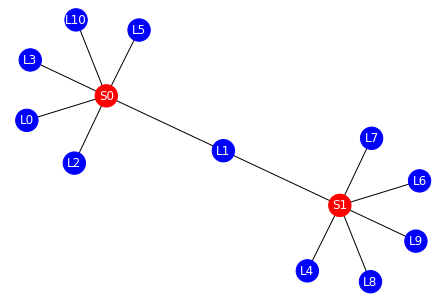

In [6]:
recovered_neuron.plot_soma_limb_concept_network()

In [7]:
import skeleton_utils as sk
limb_name = "L2"
current_soma = "S0"
limb_obj = recovered_neuron.concept_network.nodes[limb_name]["data"]
sk.graph_skeleton_and_mesh(other_meshes=[limb_obj.mesh])

# -- MeshAfterParty

In [8]:
import skeleton_utils as sk



In [10]:
sk.graph_skeleton_and_mesh(other_meshes=[limb_obj.mesh])

In [12]:
import numpy as np
components= [np.array([  0,  46, 101,  24,  97,  96, 147,  88,  86,  81,  79, 157,  77,
       136,  48,  47, 104, 105, 103, 145,   1,   2, 129,   5,   6,   7,
       111, 127, 125,  12, 124, 123, 122, 119,  10]), np.array([ 89, 126, 148, 100, 152, 134,  55,  51,  45, 137,  28, 164, 165,
       159,  21,   9,   3,  35]), np.array([ 36,  99,  95,  65,  94, 108, 109, 167,  66,  22,  64,  62,  98,
        93, 116, 143, 166,  38,  53,   4, 131,  49, 133,  63,  33]), np.array([ 26,  44,  43,  19, 106, 107, 161, 115,   8, 135,  25,  18,  91,
        85, 149,  40,  80, 150,  37, 154,  54]), np.array([160, 141, 140,  57,  56,  13,  11, 139,  58,  39,  50, 132,  41,
        42,  52,  59, 114,  72,  92,  83, 151,  23, 153, 102, 155,  71,
        68,  69, 146,  67, 144,  29,  70]), np.array([162, 138, 163, 158, 142, 156,  84, 128,  14,  15,  16,  17,  20,
        27,  30,  31,  32,  34,  60,  61,  73,  74,  75,  76,  78,  82,
        87,  90, 110, 113, 117, 118, 130, 168]), np.array([112, 120, 121])]

In [15]:
for c in components:
    print(len(c))

35
18
25
21
33
34
3


In [17]:
import trimesh_utils as tu
tu = reload(tu)
sk = reload(sk)

skeletonize_time = time.time()
sk_meshafterparty = sk.skeletonize_connected_branch(limb_obj.mesh)
print(f"Total time for meshAfterParty skeletonization = {time.time() - skeletonize_time}")


     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 196
xvfb-run -n 196 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Skeletonization_meshparty/temp/None.off -o /notebooks/Platinum_Skeletonization_meshparty/temp/None_poisson.off -s /notebooks/Platinum_Skeletonization_meshparty/temp/poisson_177215.mls
-----Time for Screened Poisson= 19.17199420928955


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1784
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 114671



Total Mesh subtraction time = 30.9603



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.5023119449615479
The process was using a temp folder
Total time for meshAfterParty skeletonization = 61.03302025794983


In [18]:

filter_end_node_length = 5000
sk_meshafterparty_cleaned = sk.clean_skeleton(sk_meshafterparty,
                                    distance_func=sk.skeletal_distance,
                              min_distance_to_junction=filter_end_node_length, #this used to be a tuple i think when moved the parameter up to function defintion
                              return_skeleton=True,
                              print_flag=False)

Using Distance measure skeletal_distance


# -- Meshparty --

In [19]:
import meshparty

In [20]:
# Getting a root point
import trimesh_utils as tu



touching_limb,touching_vertices = tu.mesh_pieces_connectivity(recovered_neuron.mesh,
                                                               recovered_neuron.concept_network.nodes[current_soma]["data"].mesh,
                                                               [limb_obj.mesh],
                                                              return_vertices=True
                                                              )
root = touching_vertices[0][0]
root

TrackedArray([757964.8, 960165. , 866226.1])

In [39]:
print("hi")

hi


In [21]:
# How to get the skeleton using just the root
import meshparty.skeletonize  as m_sk
from meshparty import trimesh_io

In [22]:
limb_obj_tr_io  = trimesh_io.Mesh(vertices = limb_obj.mesh.vertices,
                                       faces = limb_obj.mesh.faces,
                                       normals=limb_obj.mesh.face_normals)

In [23]:
from importlib import reload
import meshparty_skeletonize as m_sk
m_sk = reload(m_sk)

In [25]:
skeletonize_time = time.time()

sk_meshparty_obj, v = m_sk.skeletonize_mesh(limb_obj_tr_io,
                      soma_pt = root,
                      soma_radius = 0,
                      collapse_soma = False,
                      invalidation_d=12000,
                      smooth_vertices=True,
                       smooth_neighborhood = 1,
                      compute_radius = True, #Need the pyembree list
                      compute_original_index=True,
                      verbose=True)
print(f"Total time for meshParty skeletonization = {time.time() - skeletonize_time}")

sk_meshparty = sk_meshparty_obj.vertices[sk_meshparty_obj.edges]
sk_meshparty.shape

  0%|          | 0/56971 [00:00<?, ?it/s]

smooth_neighborhood = 1
smooth_neighborhood = 1



100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


Total time for meshParty skeletonization = 1.304569959640503


(3948, 2, 3)

# Comparing the Actual Skeletons

In [27]:
sk_meshafterparty_cleaned.shape

(1963, 2, 3)

In [28]:
sk.graph_skeleton_and_mesh(other_meshes=[limb_obj.mesh],
                          other_skeletons=[sk_meshparty,sk_meshafterparty_cleaned],
                          other_skeletons_colors=["red","black"])

In [35]:
sk_meshparty_obj.mesh_to_skel_map.shape

(56972,)

In [33]:
v.shape, limb_obj_tr_io.vertices.shape

((56972,), (56972, 3))

In [38]:
limb_obj_tr_io.vertex_faces.shape

(56972, 17)

In [79]:
limb_obj_tr_io.vertex_faces

array([[79343, 78357, 78356, ...,    -1,    -1,    -1],
       [98790, 98789, 96609, ...,    -1,    -1,    -1],
       [39123, 38931, 38930, ...,    -1,    -1,    -1],
       ...,
       [ 8785,  8677,  8658, ...,    -1,    -1,    -1],
       [64744, 64735, 63939, ...,    -1,    -1,    -1],
       [83370, 83179, 83159, ...,    -1,    -1,    -1]])

array([[79343, 78357, 78356, ...,    -1,    -1,    -1],
       [98790, 98789, 96609, ...,    -1,    -1,    -1],
       [39123, 38931, 38930, ...,    -1,    -1,    -1],
       ...,
       [ 8785,  8677,  8658, ...,    -1,    -1,    -1],
       [64744, 64735, 63939, ...,    -1,    -1,    -1],
       [83370, 83179, 83159, ...,    -1,    -1,    -1]])

# Checking on the decomposition and the correspondence

In [48]:
"""
How to create branches and their mesh correspondence directly from meshparty
1) Decompose the skeleton into branches (BUT GET LIST OF WHICH VERTICES BELONG TO WHICH LIST)
2) Assign all original mesh vertices to which branch
3) Use the vertices to map to the faces that use that vertex (and do a np.unique on faces)
4) Send these face assignments through the cleaning face mapping

Visualize:
"""
#computing the segments
m_sk = reload(m_sk)
sk = reload(sk)

# --- Step 1: Decompose the Branches ---- 

In [46]:
segments, segment_maps = m_sk.compute_segments(sk_meshparty_obj)
len(segments)

47

In [49]:
segments_AFTER, segment_indices_AFTER = sk.decompose_skeleton_to_branches(sk_meshparty,return_indices=True)

In [50]:
len(segment_indices_AFTER)

47

In [64]:
len(np.concatenate(segment_indices_AFTER)), len(np.concatenate(segments)), len(sk_meshparty_obj.vertices)

(3995, 3995, 3949)

In [62]:
# show that current number was calculated or branch segments
sk_meshparty_graph = sk.convert_skeleton_to_graph(sk_meshparty)
degree_dict = dict(sk_meshparty_graph.degree)
node_degrees = np.array(list(degree_dict.values()))
low_degree_nodes = node_degrees[node_degrees <= 2]
high_degree_nodes = node_degrees[node_degrees > 2]
np.sum(high_degree_nodes) + len(low_degree_nodes)

3995

# Creating the mesh correspondence

In [ ]:
# -- Step 2: Get original vertices mappings --

In [264]:
import general_utils as gu
gu = reload(gu)

In [265]:
my_map =sk_vertices_to_mesh_vertices
#my_map = {1:5,6:7}
print(list(my_map.values())[0])


[0, 5343, 5624, 6548, 12117, 12654, 16830, 19997, 20250, 25695, 34909, 35667, 36489, 38903, 43916, 47342, 48414, 48613, 51387, 52228, 54323]


In [266]:
sk_vertices_to_mesh_vertices = gu.invert_mapping(sk_meshparty_obj.mesh_to_skel_map)
#getting a list of all the original vertices that belong to each segment
segment_mesh_vertices = [np.unique(np.concatenate([sk_vertices_to_mesh_vertices[k] for k in segment_list])) for segment_list in segments]
#getting a list of all the original vertices that belong to each segment
segment_mesh_faces = [np.unique(limb_obj.mesh.vertex_faces[k]) for k in segment_mesh_vertices]
segment_mesh_faces = [k[k>=0] for k in segment_mesh_faces]

face_lookup = gu.invert_mapping(segment_mesh_faces)

# --- Debugging the Label filling ----- 

In [254]:
# # test out by getting the mesh mapping from meshafter party and sending through
# branch_list = np.array(list(limb_obj.concept_network.nodes())).astype("int")

# """
# Pseudocode:
# 1) get the branch mesh
# 2) backtrack to limb mesh indices
# 3) Assign those indices the labels

# """
# face_lookup = dict([(j,[]) for j in range(0,len(curr_limb_mesh.faces))])

# for k in branch_list:
#     curr_branch = limb_obj.concept_network.nodes[branch_list[k]]["data"]
#     curr_branch_original_face_indices = tu.original_mesh_faces_map(limb_obj.mesh,curr_branch.mesh)
#     curr_branch_original_face_indices

#     #checking the right one 
#     # sk.graph_skeleton_and_mesh(other_meshes=[limb_obj.mesh.submesh([curr_branch_original_face_indices],append=True),
#     #                                         curr_branch.mesh],
#     #                           other_meshes_colors=["red","black"])

#     for i in curr_branch_original_face_indices:
#         face_lookup[i].append(k)

# curr_limb_mesh = limb_obj.mesh
# #here is where can call the function that resolves the face labels
# face_coloring_copy = cu.resolve_empty_conflicting_face_labels(
#                  curr_limb_mesh = curr_limb_mesh,
#                  face_lookup=face_lookup,
#                  no_missing_labels = list(original_labels)
# )

# test_0_seg_from_face_lookup = np.array([k for k,v in face_lookup.items() if 0 in v])
# print(test_0_seg_from_face_lookup)
# test_0_seg_from_face_lookup_RECOVERED =  np.where(face_coloring_copy==0)[0]
# print(test_0_seg_from_face_lookup_RECOVERED)
# np.setdiff1d(test_0_seg_from_face_lookup,test_0_seg_from_face_lookup_RECOVERED).shape

In [262]:
# import networkx as nx
# curr_limb_mesh = limb_obj.mesh
# from tqdm_utils import tqdm

# import itertools 
# original_labels = set(list(itertools.chain.from_iterable(list(face_lookup.values()))))
# print(f"max(original_labels),len(original_labels) = {(max(original_labels),len(original_labels))}")

# #------------------- start of the function ---------------------------------------------------------
# #here is where can call the function that resolves the face labels
# curr_limb_mesh = curr_limb_mesh
# face_lookup=face_lookup
# no_missing_labels = list(original_labels)


# if len(no_missing_labels) == 0:
#     no_missing_labels = list(set(list(itertools.chain.from_iterable(list(face_lookup.values())))))

# #get all of the faces that don't have any faces corresponding
# empty_indices = np.array([k for k,v in face_lookup.items() if len(v) == 0])

# #get all of the faces that don't have any faces corresponding
# conflict_indices = np.array([k for k,v in face_lookup.items() if len(v) >= 2])

# print(f"empty_indices % = {len(empty_indices)/len(face_lookup.keys())}\n conflict_indices % = {len(conflict_indices)/len(face_lookup.keys())}")


# #face_coloring = np.array([-1 if len(v) != 1 else v[0] for v in face_lookup.values()])

# #doing the face coloring (new way if the keys are unordered)
# face_coloring = np.full(len(curr_limb_mesh.faces),-1)
# for k,v in face_lookup.items():
#     if len(v) == 1:
#         face_coloring[k] = v[0]

# # -- Need to only take the biggest piece of the non-conflicted mesh and resolve those that were eliminated--

# face_coloring = cu.filter_face_coloring_to_connected_components(curr_limb_mesh,face_coloring)

# # ----fixing if there were any missing labels --- **** this still has potential for erroring ****

# leftover_labels = np.unique(face_coloring)
# missing_labels = set(np.setdiff1d(no_missing_labels.copy(), leftover_labels))

# for curr_label in missing_labels:
#     labels_idx = [k for k,v in face_lookup.items() if curr_label in v]
#     face_coloring[labels_idx] = curr_label

# #filter the faces again: 
# face_coloring = cu.filter_face_coloring_to_connected_components(curr_limb_mesh,face_coloring)

# leftover_labels = np.unique(face_coloring)
# missing_labels = set(np.setdiff1d(no_missing_labels.copy(), leftover_labels))

# if len(missing_labels)>0:
#     raise Exception("missing labels was not resolved")

# # -----now just divide the groups into seperate components
# empty_faces = np.where(face_coloring==-1)[0]

# mesh_graph = nx.from_edgelist(curr_limb_mesh.face_adjacency) # creating a graph from the faces
# empty_submesh = mesh_graph.subgraph(empty_faces) #gets the empty submeshes that are disconnected
# empty_connected_components = list(nx.connected_components(empty_submesh))

# # ---- Functions that will fill in the rest of the mesh correspondence ---- #

# face_coloring_copy = face_coloring.copy()

# for comp in tqdm(empty_connected_components):
#     face_lookup_resolved_test = cu.waterfill_labeling(
#                     #total_mesh_correspondence=face_lookup_resolved_test,
#                     total_mesh_correspondence=face_coloring_copy,
#                      submesh_indices=list(comp),
#                      total_mesh=None,
#                     total_mesh_graph=mesh_graph,
#                      propagation_type="random",
#                     max_iterations = 1000,
#                     max_submesh_threshold = 30000
#                     )

# # -- wheck that the face coloring did not have any empty faces --
# empty_faces = np.where(face_coloring_copy==-1)[0]
# if len(empty_faces) > 0:
#     raise Exception(f"empty faces were greater than 0 after waterfilling at: {empty_faces}")


# return_value =  face_coloring_copy

# # #------------------- END of the function ---------------------------------------------------------

# curr_segment_from_face_lookup = np.array([k for k,v in face_lookup.items() if 0 in v])
# print(curr_segment_from_face_lookup.shape)
# curr_segment_resolved_faces = np.where(face_coloring_copy==0)[0]
# print(curr_segment_resolved_faces.shape)
# np.setdiff1d(curr_segment_from_face_lookup,curr_segment_resolved_faces).shape

max(original_labels),len(original_labels) = (46, 47)
empty_indices % = 0.0
 conflict_indices % = 0.018374305622171256


# -------- Resume the Mesh Correspondence ---------- 

In [270]:
import itertools 
curr_limb_mesh = limb_obj.mesh

import compartment_utils as cu
cu = reload(cu)

original_labels = set(list(itertools.chain.from_iterable(list(face_lookup.values()))))
print(f"max(original_labels),len(original_labels) = {(max(original_labels),len(original_labels))}")

face_coloring_copy = cu.resolve_empty_conflicting_face_labels(curr_limb_mesh = curr_limb_mesh,
                                                            face_lookup=face_lookup,
                                                            no_missing_labels = list(original_labels))


# -- splitting the mesh pieces into individual pieces
divided_submeshes,divided_submeshes_idx = tu.split_mesh_into_face_groups(curr_limb_mesh,face_coloring_copy)

max(original_labels),len(original_labels) = (46, 47)
empty_indices % = 0.0
 conflict_indices % = 0.018374305622171256


# Getting the skeletons

In [272]:
# getting the skeletons that go with them
segment_branches = [sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments]

# Getting the widths

In [307]:
import trimesh_utils as tu
tu = reload(tu)

In [310]:
limb_obj_sdf_faces = tu.ray_trace_distance(mesh=limb_obj.mesh, 
                    face_inds=np.arange(0,len(limb_obj.mesh.faces)), 
                   vertex_inds=None,
                   ray_origins=None,
                   ray_directions=None,
                   max_iter=100, 
                   rand_jitter=0.001, 
                   verbose=True,
                   ray_inter=None)

unique_labels = np.sort(np.unique(face_coloring_copy))
branch_widths_mean = dict()
branch_widths_median = dict()
for lab in tqdm(unique_labels):
    faces = np.where(face_coloring_copy==lab)[0]
    face_widths = limb_obj_sdf_faces[faces]
    face_widths = face_widths[face_widths>0]
    branch_widths_mean[lab] = np.mean(face_widths)
    branch_widths_median[lab] = np.median(face_widths)

# Stored Width Investigating

In [298]:
segment_width_measurements = [sk_meshparty_obj.vertex_properties["rs"][k] for k in segments]
len(segment_width_measurements)

47

In [274]:
sk.graph_skeleton_and_mesh(other_meshes=list(divided_submeshes.values()),
                           other_meshes_colors="random",
                          other_skeletons=segment_branches,
                           other_skeletons_colors="random")

In [186]:
current_segment = segments[curr_seg]

# visualize 1 skeleton at a time 

In [313]:
k = 0
curr_mesh = list(divided_submeshes.values())[k]
curr_skeleton = segment_branches[k]
print(curr_skeleton.shape)
print(curr_mesh)
print(sk.calculate_skeleton_distance(curr_skeleton))
print(f"mean(width) = {np.mean(segment_width_measurements[k])}, median(width) = {np.median(segment_width_measurements[k])}")
print(f"branch_widths_mean[{k}] = {branch_widths_mean[k]}, branch_widths_median[{k}] = {branch_widths_median[k]}")

sk.graph_skeleton_and_mesh(
                            other_meshes=[curr_mesh],
                           other_meshes_colors="red",
                          other_skeletons=[curr_skeleton],
                           other_skeletons_colors="black",
)



(207, 2, 3)
<trimesh.Trimesh(vertices.shape=(1208, 3), faces.shape=(2416, 3))>
37534.55518395377
mean(width) = 209.10604602996207, median(width) = 164.49479997169394
branch_widths_mean[0] = 282.30498101906005, branch_widths_median[0] = 184.3932433305481


# Finding the matching pieces between the meshparty and meshAfterParty segmentation

# ----- Save for Later when have concept graphs ----- 

In [289]:
sk.graph_skeleton_and_mesh(other_meshes=[limb_obj.mesh,curr_mesh],
                          other_meshes_colors=["grey","red"],
                          other_skeletons=[curr_skeleton])

In [174]:
curr_segment_mesh_vertices = np.arange(0,len(limb_obj.mesh.vertices))[np.in1d(sk_meshparty_obj.mesh_to_skel_map,current_segment)]
curr_segment_mesh_vertices.shape

(1214,)

In [175]:
sk.graph_skeleton_and_mesh(other_skeletons=[segment_branches[curr_seg]],
                          other_scatter=[limb_obj.mesh.vertices[curr_segment_mesh_vertices]])

In [183]:
# checking that I can get the right faces from the vertices
curr_segment_faces = np.unique(np.concatenate(limb_obj.mesh.vertex_faces[curr_segment_mesh_vertices]))[1:]
curr_segment_faces_mesh = limb_obj.mesh.submesh([curr_segment_faces],append=True)
curr_segment_faces_mesh
sk.graph_skeleton_and_mesh(other_skeletons=[segment_branches[curr_seg]],
                          other_meshes=[curr_segment_faces_mesh])

[8]

In [190]:
other_way_vertices = np.unique(np.concatenate([sk_vertices_to_mesh_vertices[k] for k in current_segment]))

In [193]:
other_way_vertices.shape,curr_segment_mesh_vertices.shape

((1214,), (1214,))

In [197]:
curr_segment_faces_mesh_vp2 = limb_obj.mesh.submesh([segment_mesh_faces[0]],append=True)
sk.graph_skeleton_and_mesh(other_skeletons=[segment_branches[curr_seg]],
                          other_meshes=[curr_segment_faces_mesh_vp2])

In [200]:
# trying with the face lookup
curr_segment_from_face_lookup = np.array([k for k,v in face_lookup.items() if 0 in v])
curr_segment_from_face_lookup.shape
curr_segment_resolved_faces = np.where(face_coloring_copy==0)[0]
np.setdiff1d(curr_segment_from_face_lookup,curr_segment_resolved_faces).shape

(2442,)

(2442,)

In [ ]:
sk_vertices_to_mesh_vertices = gu.invert_mapping(sk_meshparty_obj.mesh_to_skel_map)
#getting a list of all the original vertices that belong to each segment
segment_mesh_vertices = [np.unique(np.concatenate([sk_vertices_to_mesh_vertices[k] for k in segment_list])) for segment_list in segments]
#getting a list of all the original vertices that belong to each segment
segment_mesh_faces = [np.unique(limb_obj.mesh.vertex_faces[k]) for k in segment_mesh_vertices]
segment_mesh_faces = [k[k>=0] for k in segment_mesh_faces]